#NIKHIL KUMAR
#2018BCS0040

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import random

## Data Understanding

In [154]:
df = pd.read_csv('MBA_ADMISSIONS.csv')
df.head()

pre_score  Age_in_years  ...  perceived#Job#Skill  Specialization
0  75.000000            22  ...      prefered skills       Marketing
1  71.666667            25  ...      prefered skills             LOS
2  76.666667            26  ...       desired skills         Finance
3  66.666667            22  ...      prefered skills         Finance
4  71.666667            24  ...      prefered skills         Finance

[5 rows x 14 columns]

##Data Preparation / Data Cleaning

In [155]:
print("Columns names")
print('-'*75)
print(df.columns)
print()
print("Dataset Information")
print('-'*75)
print(df.info())
print()
print('-'*75)
pprint(df.describe())

Columns names
---------------------------------------------------------------------------
Index(['pre_score', 'Age_in_years', 'Percentage_in_10_Class',
       'Percentage_in_12_Class', 'Percentage_in_Under_Graduate',
       'percentage_MBA', 'post_score', 'Gender', 'STATE', 'Previous_Degree',
       'Marital_status', 'Place_you_belong_to', 'perceived#Job#Skill',
       'Specialization'],
      dtype='object')

Dataset Information
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pre_score                     473 non-null    float64
 1   Age_in_years                  473 non-null    int64  
 2   Percentage_in_10_Class        473 non-null    float64
 3   Percentage_in_12_Class        473 non-null    float64
 4   Percentage_in_Under_Gradua

In [156]:
categories = []
numerical = []

for cols in df.columns:
    if df[cols].dtype == 'object':
        categories.append(cols)
    else:
        numerical.append(cols)
print("categories columns : ", categories)
print()
print("numerical columns: ", numerical)

categories columns :  ['Gender', 'STATE', 'Previous_Degree', 'Marital_status', 'Place_you_belong_to', 'perceived#Job#Skill', 'Specialization']

numerical columns:  ['pre_score', 'Age_in_years', 'Percentage_in_10_Class', 'Percentage_in_12_Class', 'Percentage_in_Under_Graduate', 'percentage_MBA', 'post_score']


#Data Visualization - Categorical Columns

###Unique Elements in the Category Columns

In [157]:
for items in categories:
    print(items, ":", df[items].unique())

Gender : ['Male' 'Female']
STATE : ['Central Zone' 'East Zone' 'North East' 'North Zone' 'South Zone'
 'West Zone']
Previous_Degree : ['Engineering' 'Commerce' 'Management' 'Science' 'Arts']
Marital_status : ['Single' 'Married']
Place_you_belong_to : ['Urban' 'Semi Urban' 'Rural']
perceived#Job#Skill : ['prefered skills' 'desired skills' 'required skills']
Specialization : ['Marketing' 'LOS' 'Finance' 'HR']


###Univariate Analysis

In [158]:
f, ax = plt.subplots(4,2, figsize=(25, 25))

for items, subplot in zip(categories, ax.flatten()):
    sns.countplot(x=items, data=df, ax=subplot, palette = 'hsv').set_title('Distribution of {}'.format(items))
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

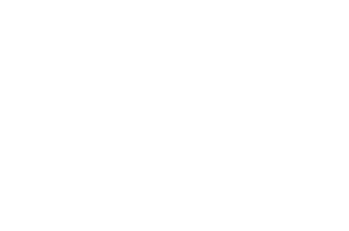

In [159]:
f, ax = plt.subplots(4,2, figsize=(25, 25))
x = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

for items, subplot in zip(categories, ax.flatten()):
    labels = df[items].unique()
    size = df[items].value_counts()
    explode = x[0:len(labels)]
    subplot.pie(size, labels = labels,explode = explode,shadow = True, autopct = '%.2f%%')
    subplot.text(-0.4, 1.3, items, fontsize = 20)
    subplot.legend(loc=3)
plt.show()
plt.tight_layout()
plt.axis('off')

##Numerical Data Analysis - Scatter Plots and Histograms

In [160]:
f, ax = plt.subplots(4,2, figsize=(25, 25))
color = ['g','b','r','y']
sns.set(style = 'whitegrid')
for items, subplot in zip(numerical, ax.flatten()):
    c = color[random.randint(0,3)]
    sns.distplot(df[items], norm_hist=False, kde=True, rug=False,color=c, hist_kws={"alpha": 1},ax=subplot).set_title('Distribution of {}'.format(items))
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

In [161]:
# More Bins for scrutiny

f, ax = plt.subplots(4,2, figsize=(25, 25))
color = ['g','b','r','y']
sns.set(style = 'whitegrid')
for items, subplot in zip(numerical, ax.flatten()):
    c = color[random.randint(0,3)]
    sns.distplot(df[items], norm_hist=False, kde=True, rug=False,color=c, hist_kws={"alpha": 1}, bins=100, ax=subplot).set_title('Distribution of {}'.format(items))
    plt.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

##Bi-Variate Analysis

###Distribution of percentage_MBA scores across categorical columns for each gender
Can be extended for other categories based on data understanding

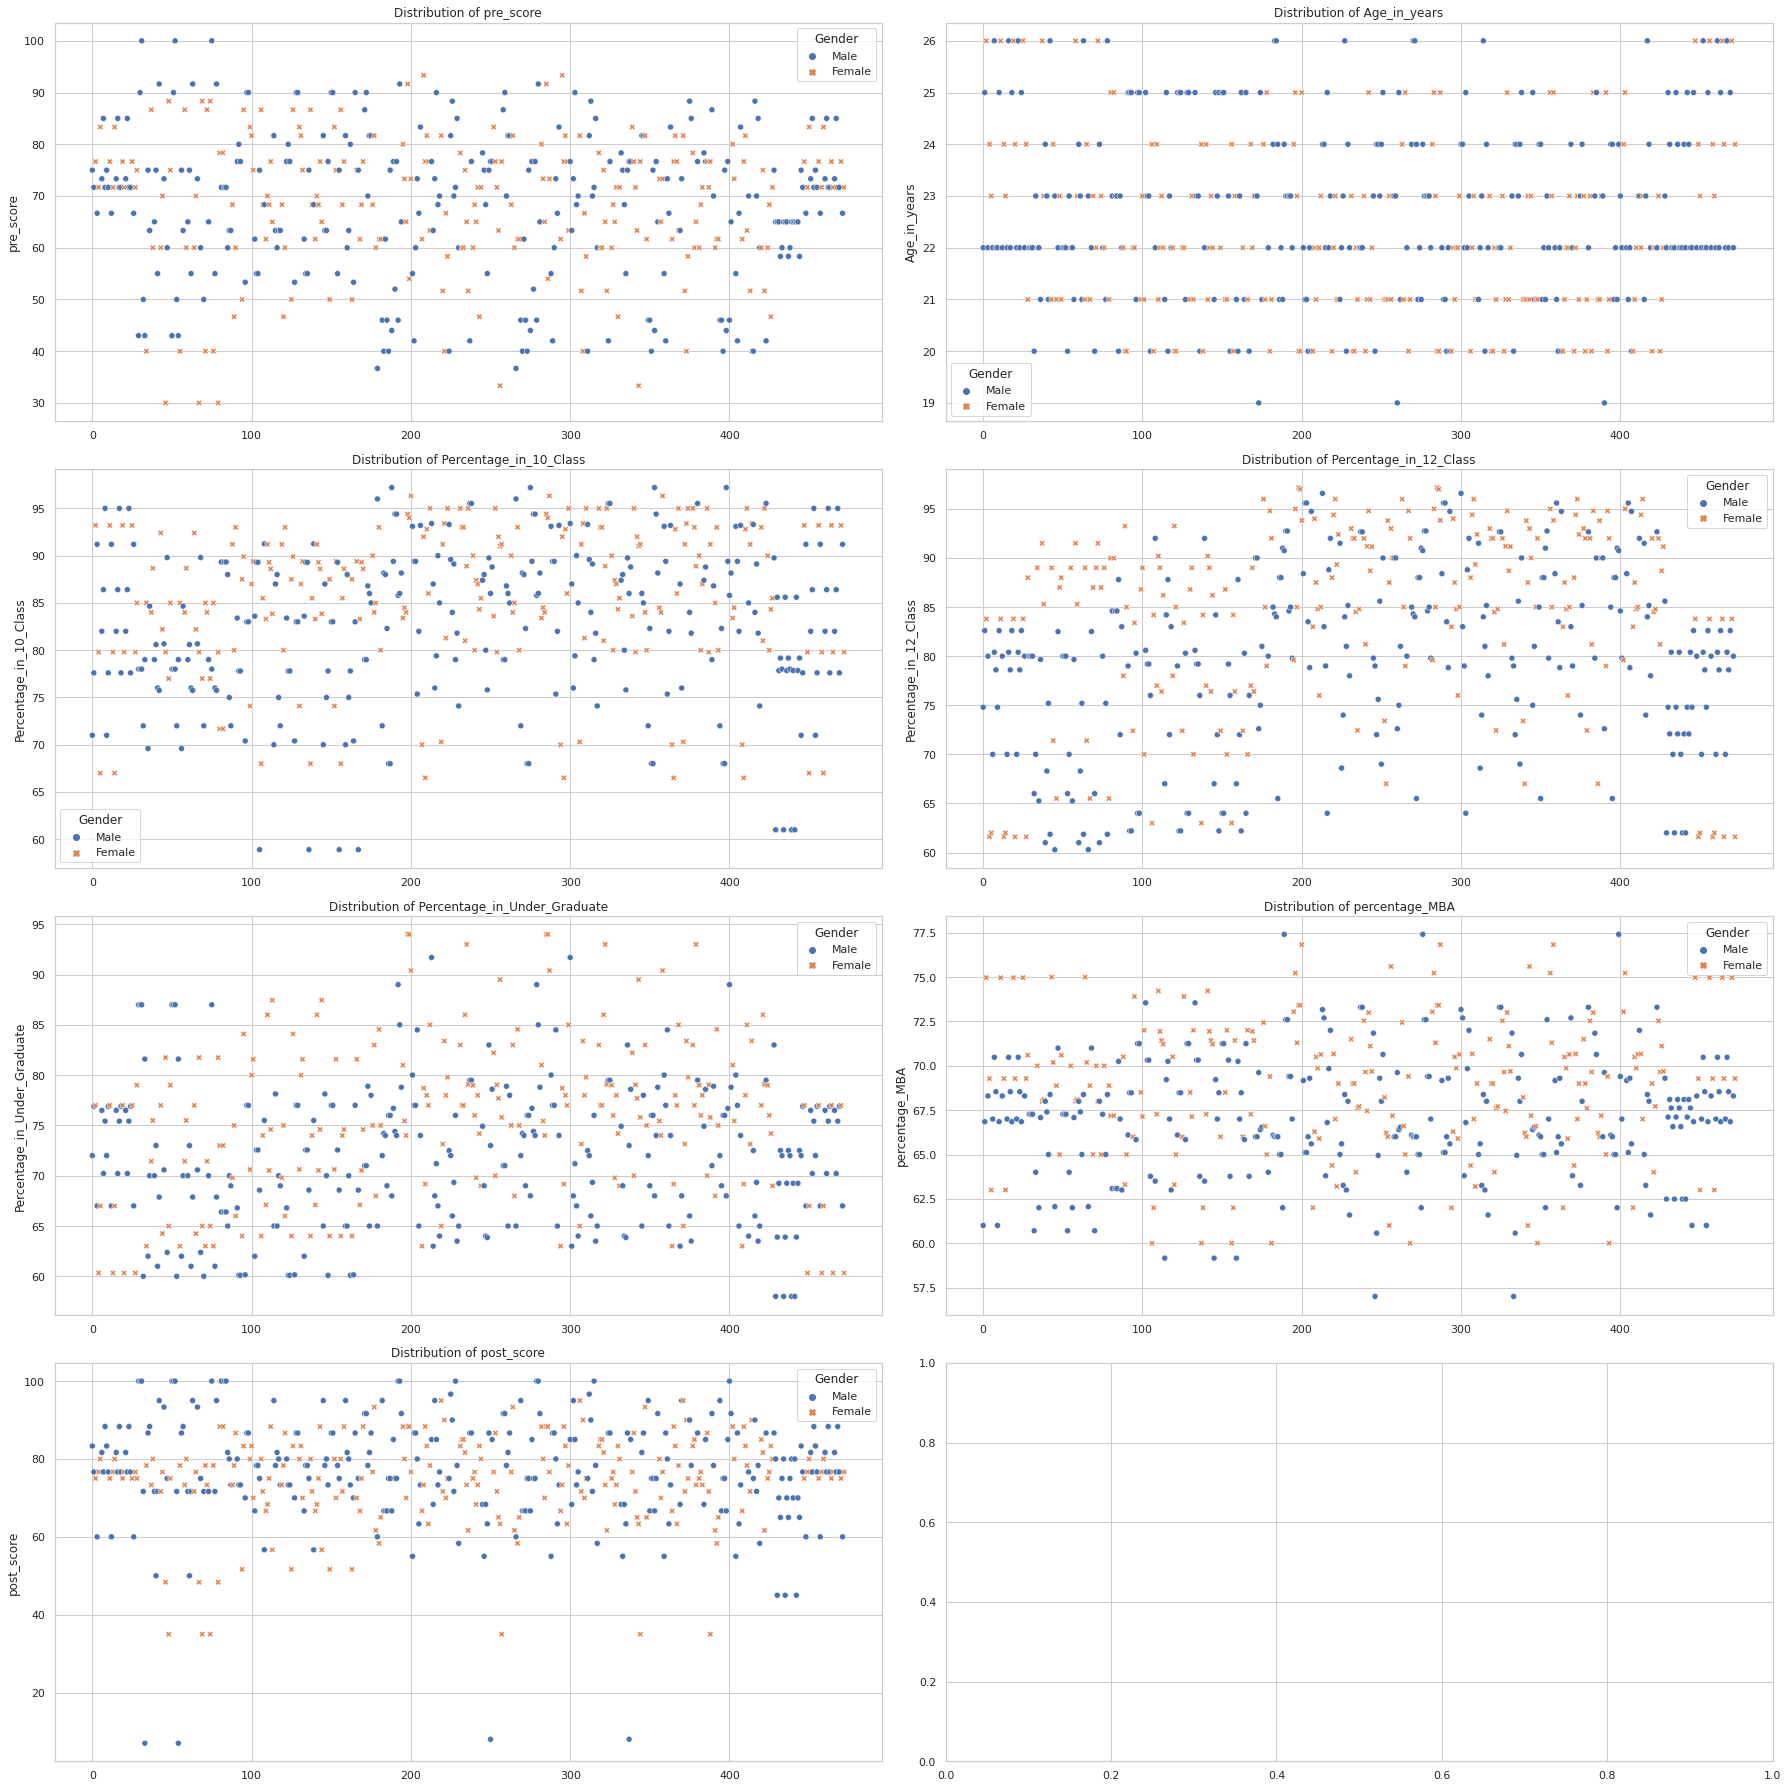

In [162]:
f, ax = plt.subplots(4,2, figsize=(25, 25))
sns.set_style("white")

for items, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(data=df, y=items,x=df.index, hue="Gender", style="Gender", ax=subplot).set_title("Distribution of {}".format(items))
plt.tight_layout()
plt.show()

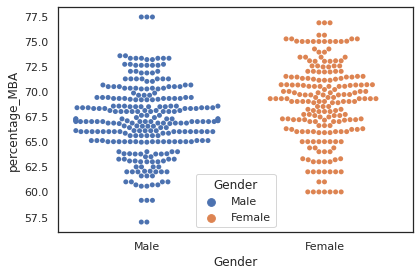

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


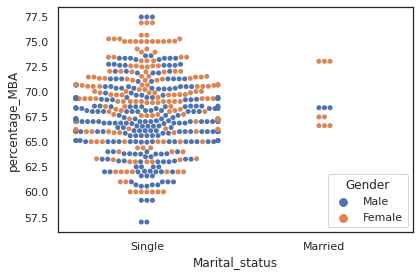

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


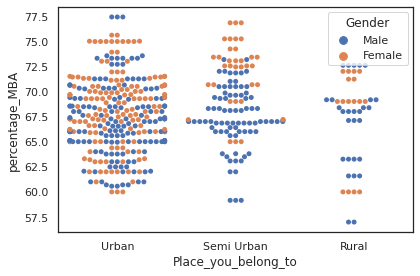

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


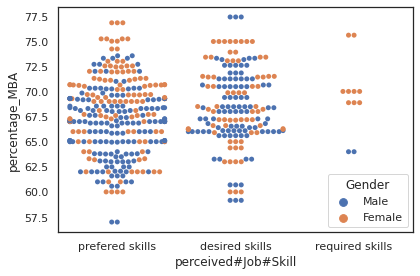

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


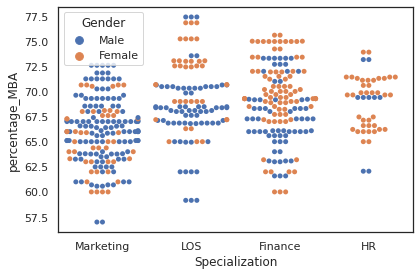

In [163]:
for i,items in enumerate(categories):
    sns.swarmplot(data=df, x=items, y="percentage_MBA", hue="Gender")
    plt.tight_layout()
    plt.show()

##Box Plot for outlier and major contribution analysis

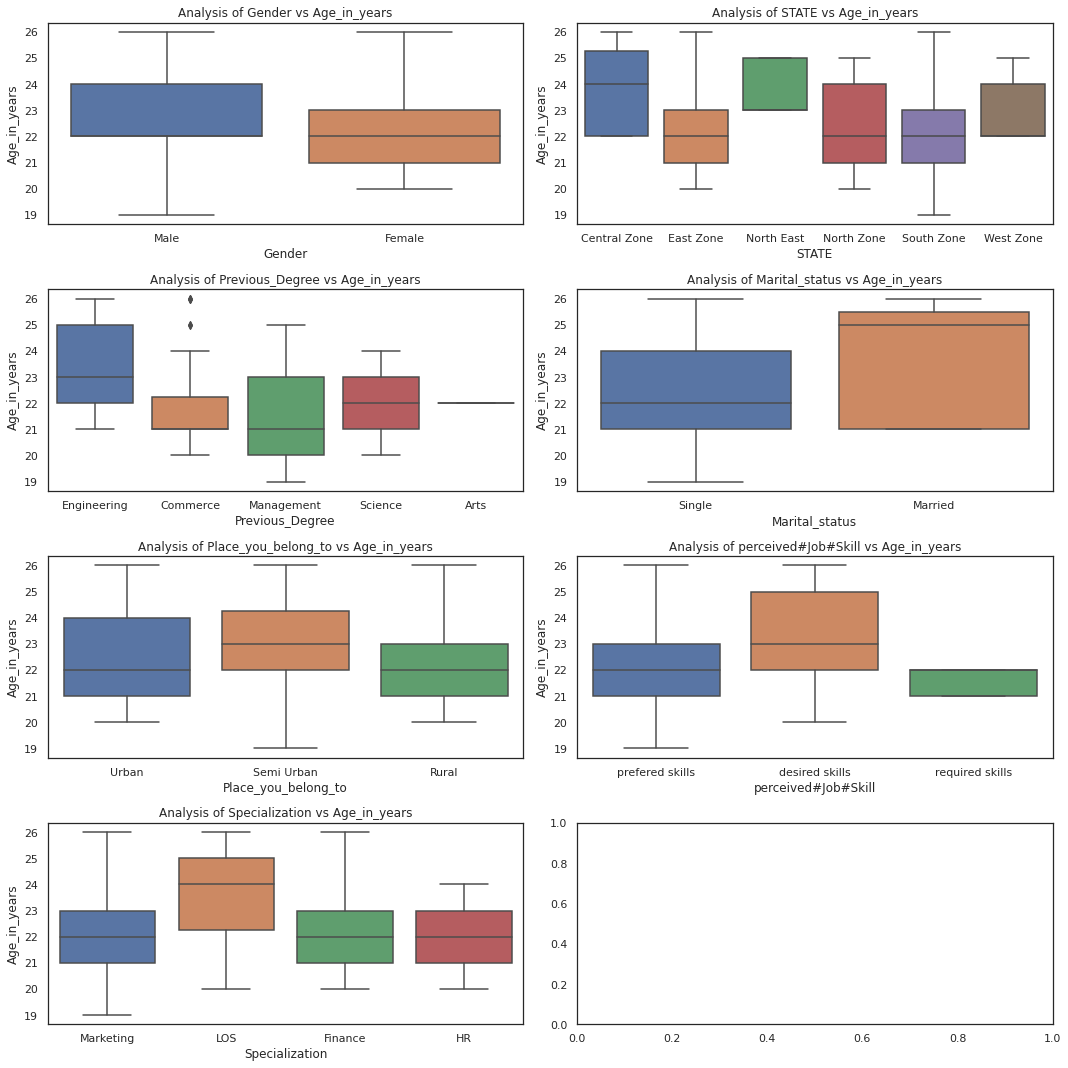

In [164]:
f, ax = plt.subplots(4,2, figsize=(15, 15))
for var, subplot in zip(categories, ax.flatten()):
    sns.boxplot(x=var, y='Age_in_years', data=df, ax=subplot).set_title("Analysis of {} vs Age_in_years".format(var))
    plt.tight_layout()

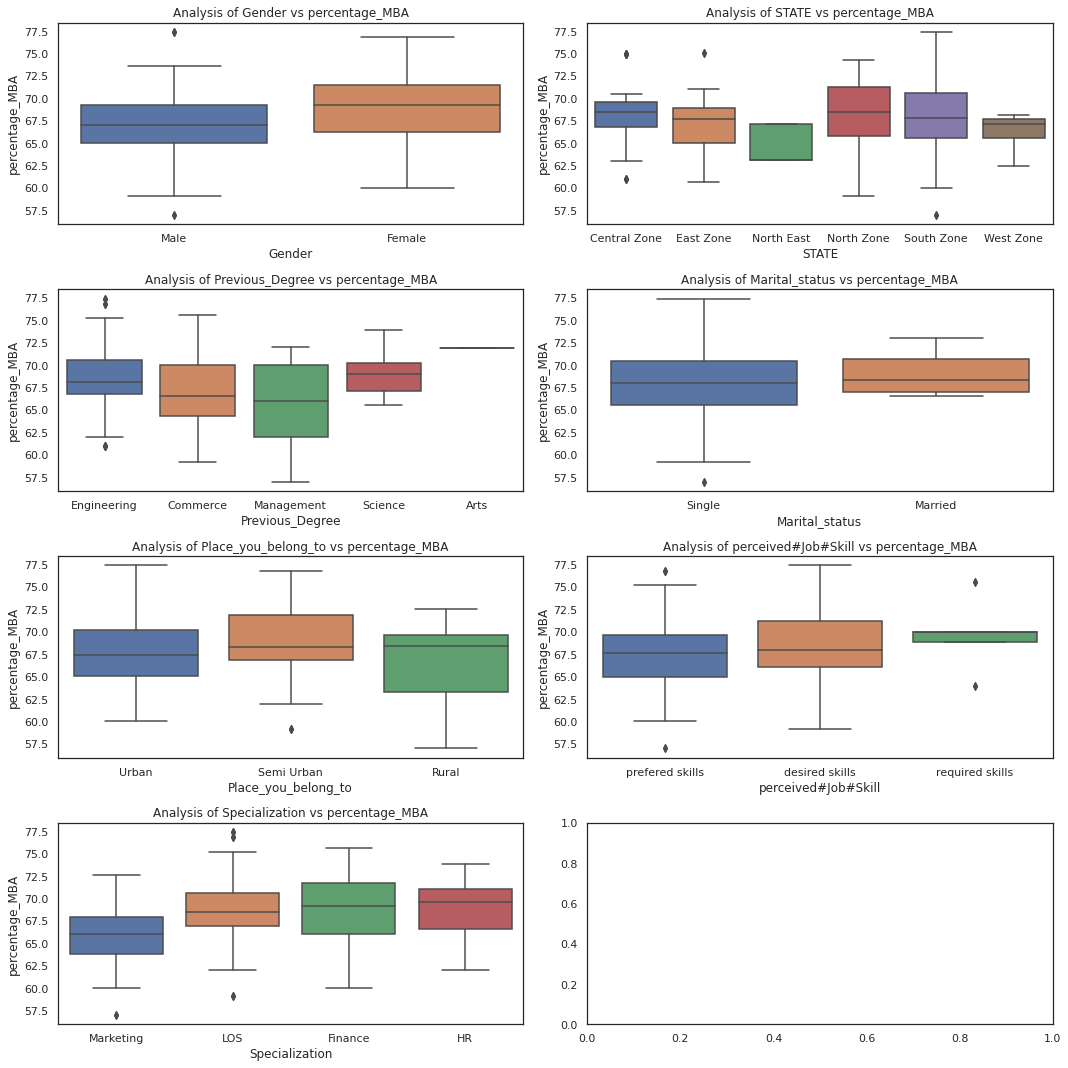

In [165]:
f, ax = plt.subplots(4,2, figsize=(15, 15))
for var, subplot in zip(categories, ax.flatten()):
    sns.boxplot(x=var, y='percentage_MBA', data=df, ax=subplot).set_title("Analysis of {} vs percentage_MBA".format(var))
    plt.tight_layout()

In [166]:
df.head(5)

pre_score  Age_in_years  ...  perceived#Job#Skill  Specialization
0  75.000000            22  ...      prefered skills       Marketing
1  71.666667            25  ...      prefered skills             LOS
2  76.666667            26  ...       desired skills         Finance
3  66.666667            22  ...      prefered skills         Finance
4  71.666667            24  ...      prefered skills         Finance

[5 rows x 14 columns]

##Splitting data and result of MBA in X and y

In [226]:
X = df.iloc[:,:-1].values
y = df.iloc[:, 6].values

In [227]:
y

array([ 83.33333333,  76.66666667,  75.        ,  60.        ,
        76.66666667,  80.        ,  81.66666667,  76.66666667,
        88.33333333,  83.33333333,  76.66666667,  75.        ,
        60.        ,  76.66666667,  80.        ,  81.66666667,
        76.66666667,  88.33333333,  76.66666667,  75.        ,
        76.66666667,  81.66666667,  76.66666667,  88.33333333,
        76.66666667,  75.        ,  60.        ,  76.66666667,
        75.        , 100.        , 100.        , 100.        ,
        71.66666667,   7.        ,  78.33333333,  86.66666667,
        88.33333333,  73.33333333,  80.        ,  71.66666667,
        50.        ,  71.66666667,  95.        ,  71.66666667,
        76.66666667,  93.33333333,  48.33333333,  75.        ,
        35.        ,  75.        , 100.        , 100.        ,
       100.        ,  71.66666667,   7.        ,  78.33333333,
        86.66666667,  88.33333333,  73.33333333,  80.        ,
        71.66666667,  50.        ,  71.66666667,  95.  

### Converting categorical variables to numerical variables

In [228]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [229]:
le =  LabelEncoder()
X[:,7] = le.fit_transform(X[:,7])
X[:,8] = le.fit_transform(X[:,8])
X[:,9] = le.fit_transform(X[:,9])
X[:,10] = le.fit_transform(X[:,10])
X[:,11] = le.fit_transform(X[:,11])
X[:,12] = le.fit_transform(X[:,12])
y = le.fit_transform(y)

In [230]:
y

array([24, 20, 19, 10, 20, 22, 23, 20, 27, 24, 20, 19, 10, 20, 22, 23, 20,
       27, 20, 19, 20, 23, 20, 27, 20, 19, 10, 20, 19, 33, 33, 33, 17,  0,
       21, 26, 27, 18, 22, 17,  5, 17, 31, 17, 20, 30,  4, 19,  2, 19, 33,
       33, 33, 17,  0, 21, 26, 27, 18, 22, 17,  5, 17, 31, 17, 20, 30,  4,
       19,  2, 17, 21, 18, 17,  2, 33, 21, 17, 31,  4, 27, 33, 27, 33, 33,
       23, 22, 18, 18, 21, 26, 22, 18, 18,  6, 24, 16, 26, 26, 22, 24, 16,
       14, 21, 21, 19, 22, 17,  8, 14, 15, 19, 27,  8, 31, 21, 23, 22, 18,
       18, 21, 26, 22, 18, 18,  6, 24, 16, 26, 26, 22, 24, 16, 14, 21, 21,
       19, 22, 17,  8, 14, 15, 19, 27,  8, 31, 21, 22, 18,  6, 26, 26, 22,
       16, 21, 19, 22, 17, 27, 31, 23, 22, 18,  6, 16, 26, 16, 19, 14, 19,
       27, 29, 29, 21, 23, 26, 20, 30, 11, 10,  9, 13, 31, 14, 14, 14, 19,
       19, 14, 25, 19, 19, 33, 33, 29, 27, 22, 16, 27, 27, 20,  7, 26, 26,
       22, 12, 18, 14, 18, 27, 24, 12, 21, 25, 15, 31, 25, 18, 20, 31, 17,
       28, 16, 19, 19, 32

##Spliting data into training and test set

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [232]:
y_train.size

354

#1. Decision Tree Classifier

In [233]:
dt = DecisionTreeClassifier(random_state=42)

In [234]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [235]:
y_pred_dt = dt.predict(X_test)

In [236]:
y_pred_dt

array([14, 21, 23, 26, 19, 25, 21, 19, 17, 26, 19, 16,  9, 13, 15, 13, 25,
        9, 31, 17, 20, 27, 16, 10, 20, 27, 23, 21, 18, 12, 19, 25, 24, 18,
       20, 11, 20, 14,  9, 20, 24, 13, 24, 29, 19, 23, 21, 16, 33, 23, 28,
       14, 23, 14, 18, 19, 16, 14,  0, 18,  6, 26, 26, 22, 22, 25, 14, 26,
       19, 17,  6, 21, 23, 33, 19, 18, 28, 19,  6, 24, 18, 18, 10, 23, 31,
       21, 19, 11, 29, 22, 31, 24, 20, 20, 25,  8, 25, 21, 28, 15, 18, 22,
       17, 20, 27, 27, 11, 29,  7, 19, 33,  2, 10, 30, 20, 20, 20, 20, 26])

##Performance Metrics

In [237]:
f1_score_dt = metrics.f1_score(y_test,y_pred_dt,average='macro')
print('F1 score: {0:f}'.format (f1_score_dt))
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
sdt = precision_score(y_test, y_pred_dt, average='macro')
print('precision score: {0:f}'.format (sdt))
s_dt = recall_score(y_test,y_pred_dt, average='macro')
print('recall score: {0:f}'.format (s_dt))
score_dt = metrics.accuracy_score(y_test,dt.predict(X_test))
print('Accuracy:{0:f}'.format(score_dt))

F1 score: 0.933333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         4
          18       1.00      1.00      1.00         8
          19       1.00      1.00      1.00        11
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Undefine

# 2. Random Forest

In [238]:
rf = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, min_samples_leaf=30)

In [239]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [240]:
y_pred_rf = rf.predict(X_test)

In [241]:
y_pred_rf

array([19, 20, 22, 26, 19, 22, 21, 19, 17, 26, 19, 19, 14, 19, 20, 19, 26,
       14, 22, 18, 20, 27, 14, 17, 20, 26, 22, 21, 18, 19, 19, 26, 24, 19,
       20, 19, 20, 14, 19, 20, 19, 14, 22, 26, 19, 22, 20, 14, 33, 22, 26,
       14, 22, 14, 20, 19, 19, 14, 14, 19, 14, 26, 26, 22, 22, 26, 14, 22,
       19, 17, 14, 20, 22, 26, 19, 19, 26, 19, 14, 24, 19, 18, 14, 22, 22,
       21, 19, 19, 26, 22, 22, 22, 20, 20, 26, 19, 26, 20, 22, 19, 22, 22,
       17, 20, 26, 27, 14, 26, 19, 19, 33, 20, 17, 26, 20, 20, 20, 19, 26])

##Performance Metrics

In [242]:
f1_score_rf = metrics.f1_score(y_test,y_pred_rf,average='macro')
print('F1 score: {0:f}'.format (f1_score_rf))
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
srf = precision_score(y_test, y_pred_rf, average='macro')
print('precision score: {0:f}'.format (srf))
s_rf = recall_score(y_test,y_pred_rf, average='macro')
print('recall score: {0:f}'.format (s_rf))
score_rf = metrics.accuracy_score(y_test,rf.predict(X_test))
print('Accuracy:{0:f}'.format(score_rf))

F1 score: 0.211711
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.31      0.83      0.45         6
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          17       0.60      0.75      0.67         4
          18       0.67      0.25      0.36         8
          19       0.38      1.00      0.55        11
          20       0.61      0.92      0.73        12
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3. Logistic regression

Apart from the Decision Tree and Random Forest classifiers, for the other classifiers we have to do feature scaling. We will use Standard Scaler for this purpose

In [243]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [244]:
lr = LogisticRegression(random_state=0, solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
y_pred_lr = lr.predict(X_test)

In [246]:
y_pred_lr

array([19, 17, 20, 33, 19, 26, 26, 26, 24, 27, 21, 16, 13, 14, 14, 14, 26,
       13, 20, 18, 20, 26, 17, 10, 20, 27, 20, 26, 16, 19, 19, 27, 26, 26,
       20, 14, 16, 14, 12, 20, 18, 12, 27, 26, 26, 18, 31, 17, 33, 20, 14,
       14, 18, 14, 20, 22, 16, 14,  0, 18, 16, 26, 26, 20, 23, 27, 14, 22,
       22, 17, 16, 17, 20, 33, 19, 17, 14, 26, 16, 26, 26, 18, 14, 26, 31,
       26, 25, 14, 26, 24, 27, 24, 20, 20, 27, 16, 26, 17, 31, 20, 22, 18,
       24, 18, 27, 27, 14, 29,  7, 20, 33,  2, 10, 33, 20, 20, 20, 19, 33])

##Performance Metrics

In [247]:
f1_score_lr = metrics.f1_score(y_test,y_pred_lr,average='macro')
print('F1 score: {0:f}'.format (f1_score_lr))
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
slr = precision_score(y_test, y_pred_lr, average='macro')
print('precision score: {0:f}'.format (slr))
s_lr = recall_score(y_test,y_pred_lr, average='macro')
print('recall score: {0:f}'.format (s_lr))
score_lr = metrics.accuracy_score(y_test,lr.predict(X_test))
print('Accuracy:{0:f}'.format(score_lr))

F1 score: 0.288340
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.36      0.83      0.50         6
          15       0.00      0.00      0.00         2
          16       0.25      0.50      0.33         4
          17       0.14      0.25      0.18         4
          18       0.25      0.25      0.25         8
          19       0.50      0.27      0.35        11
          20       0.50      0.75      0.60        12
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Didn't got so good result from last 2 classifiers, so implementing 2 more

#4. Naive Bayes

In [248]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [249]:
y_pred_nb = nb.predict(X_test)

In [250]:
y_pred_nb

array([14, 21, 23, 26, 19, 25, 21, 19, 17, 26, 19, 16,  9, 13, 15, 13, 25,
        9, 31, 17, 20, 27, 16, 10, 20, 27, 23, 21, 18, 12, 19, 25, 24, 18,
       20, 11, 20, 14,  9, 20, 24, 13, 24, 29, 19, 23, 21, 16, 33, 23, 28,
       14, 23, 14, 18, 19, 16, 14,  0, 18,  7, 26, 26, 22, 22, 25, 14, 26,
       19, 17,  7, 21, 23, 33, 19, 18, 28, 19,  7, 24, 18, 18, 10, 23, 31,
       21, 19, 11, 29, 22, 31, 24, 20, 20, 25,  8, 25, 21, 28, 15, 18, 22,
       17, 20, 27, 27, 11, 29,  7, 19, 33,  2, 10, 30, 20, 20, 20, 20, 26])

##Performance Metrics

In [251]:
f1_score_nb = metrics.f1_score(y_test,y_pred_nb,average='macro')
print('F1 score: {0:f}'.format (f1_score_nb))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
snb = precision_score(y_test, y_pred_nb, average='macro')
print('precision score: {0:f}'.format (snb))
s_nb = recall_score(y_test,y_pred_nb, average='macro')
print('recall score: {0:f}'.format (s_nb))
score_nb = metrics.accuracy_score(y_test,nb.predict(X_test))
print('Accuracy:{0:f}'.format(score_nb))

F1 score: 0.944828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           7       0.25      1.00      0.40         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         4
          18       1.00      1.00      1.00         8
          19       1.00      1.00      1.00        11
          20       1.00      1.00      1.00        12
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#5. K-Nearest Neighbours

In [252]:
knn = KNeighborsClassifier(n_neighbors=15)

In [253]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [254]:
y_pred_knn = knn.predict(X_test)


In [255]:
y_pred_knn

array([12, 19, 27, 19, 19, 26, 12, 12, 17, 20, 19, 19, 13, 17, 12, 17, 25,
       13, 20, 15, 20, 27, 12, 27, 20, 15, 27, 12, 20, 21, 19, 19, 24, 26,
       20, 16, 16, 18, 21, 20, 21, 12, 16, 21, 26, 15, 29, 12, 26, 27, 26,
       26, 15, 18, 19, 19, 19, 16, 10, 24,  7, 26, 26, 19, 19, 19, 26, 22,
       19, 20,  7, 19, 27, 31, 19, 22, 26, 26,  7, 24, 26, 18, 12, 12, 33,
       12, 19, 16, 21, 21, 14, 24, 20, 20, 19, 19, 25, 19, 29, 19, 19, 16,
       17, 20, 27, 24, 16, 29, 13, 19, 26,  2, 27, 22, 20, 20, 20, 19, 19])

##Performance Metrics

In [256]:
f1_score_knn = metrics.f1_score(y_test,y_pred_knn,average='macro')
print('F1 score: {0:f}'.format (f1_score_knn))
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
sknn = precision_score(y_test, y_pred_knn, average='macro')
print('precision score: {0:f}'.format (sknn))
s_knn = recall_score(y_test,y_pred_knn, average='macro')
print('recall score: {0:f}'.format (s_knn))
score_knn = metrics.accuracy_score(y_test,knn.predict(X_test))
print('Accuracy:{0:f}'.format(score_knn))

F1 score: 0.168024
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          17       0.50      0.50      0.50         4
          18       0.33      0.12      0.18         8
          19       0.32      0.73      0.44        11
          20       0.71      0.83      0.77        12
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall score: 0.182262
Accuracy:0.268908


Now we have completed training our data using 5 generally used classifiers and got the results.
So, let's now compare all the results in differetnt form of graphs

#Performance Metrics Evaluation

###Comparing Accuracies

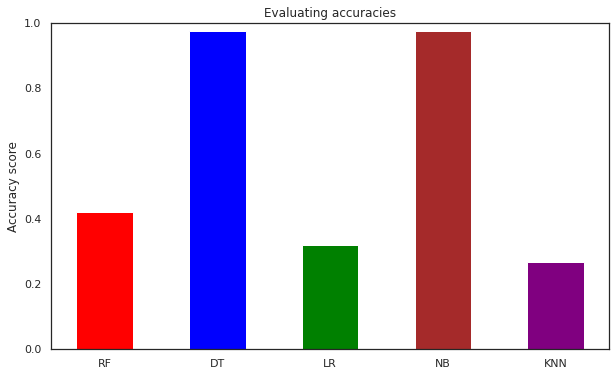

In [257]:
algo = ['RF','DT','LR','NB','KNN']
score = [score_rf, score_dt, score_lr, score_nb, score_knn]
c = ['Red','Blue','Green', 'Brown', 'Purple']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c),
plt.title('Evaluating accuracies')
plt.ylabel('Accuracy score')
plt.ylim(0,1)
plt.show()

###Comparing F1 Scores

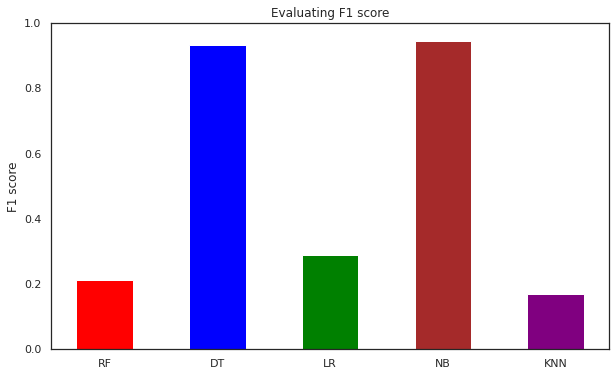

In [258]:
algo = ['RF','DT','LR','NB','KNN']
score = [f1_score_rf, f1_score_dt, f1_score_lr, f1_score_nb, f1_score_knn]
c = ['Red','Blue','Green', 'Brown', 'Purple']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating F1 score')
plt.ylabel('F1 score')
plt.ylim(0,1)
plt.show()

###Coparing precision score

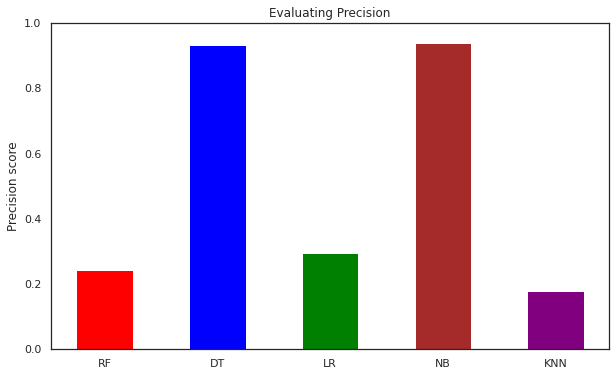

In [259]:
algo = ['RF','DT','LR','NB','KNN']
score = [srf,sdt,slr,snb,sknn]
c = ['Red','Blue','Green', 'Brown', 'Purple']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating Precision')
plt.ylabel('Precision score')
plt.ylim(0,1)
plt.show()

###Comparing recall score

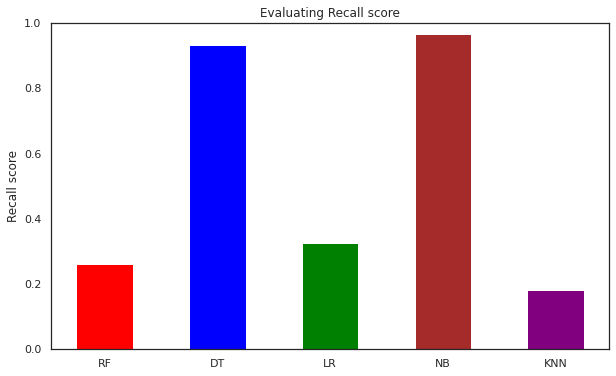

In [260]:
algo = ['RF','DT','LR','NB','KNN']
score = [s_rf,s_dt,s_lr,s_nb,s_knn]
c = ['Red','Blue','Green', 'Brown', 'Purple']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating Recall score')
plt.ylabel('Recall score')
plt.ylim(0,1)
plt.show()

#Plotting the performance

For comparing the performance, we make use of the Receiver Characteristics Curve â€“ Area Under Curve that is plotted between True positive and False positive rates, where true positive is totally positive and false positive is a total negative. The area under the curve (AUC) is the summary of this curve that tells about how good a model is when we talk about its ability to generalize.

Let's plot the ROC-AUC graph to check the best performing model.

In [261]:
y_pred_rf

array([19, 20, 22, 26, 19, 22, 21, 19, 17, 26, 19, 19, 14, 19, 20, 19, 26,
       14, 22, 18, 20, 27, 14, 17, 20, 26, 22, 21, 18, 19, 19, 26, 24, 19,
       20, 19, 20, 14, 19, 20, 19, 14, 22, 26, 19, 22, 20, 14, 33, 22, 26,
       14, 22, 14, 20, 19, 19, 14, 14, 19, 14, 26, 26, 22, 22, 26, 14, 22,
       19, 17, 14, 20, 22, 26, 19, 19, 26, 19, 14, 24, 19, 18, 14, 22, 22,
       21, 19, 19, 26, 22, 22, 22, 20, 20, 26, 19, 26, 20, 22, 19, 22, 22,
       17, 20, 26, 27, 14, 26, 19, 19, 33, 20, 17, 26, 20, 20, 20, 19, 26])

In [262]:
y_test

array([14, 21, 23, 26, 19, 25, 21, 19, 17, 26, 19, 16,  9, 13, 15, 13, 25,
        9, 31, 17, 20, 27, 16, 10, 20, 27, 23, 21, 18, 12, 19, 25, 24, 18,
       20, 11, 20, 14,  9, 20, 24, 13, 24, 29, 19, 23, 21, 16, 33, 23, 28,
       14, 23, 14, 18, 19, 16, 14,  0, 18,  3, 26, 26, 22, 22, 25, 14, 26,
       19, 17,  3, 21, 23, 33, 19, 18, 28, 19,  3, 24, 18, 18, 10, 23, 31,
       21, 19, 11, 29, 22, 31, 24, 20, 20, 25,  8, 25, 21, 28, 15, 18, 22,
       17, 20, 27, 27, 11, 29,  7, 19, 33,  2, 10, 30, 20, 20, 20, 20, 26])

#Confusion matrix

###Random Forest

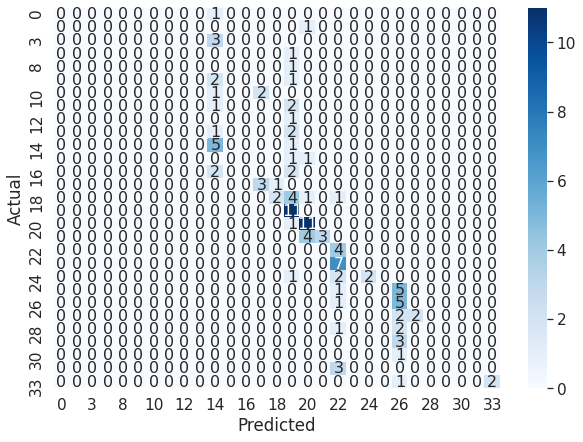

In [274]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

###K- nearest neighbour

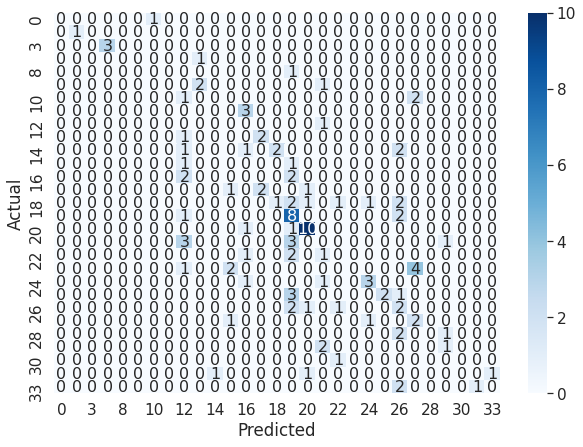

In [277]:
data = confusion_matrix(y_test, y_pred_knn)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

###Naive Bayes

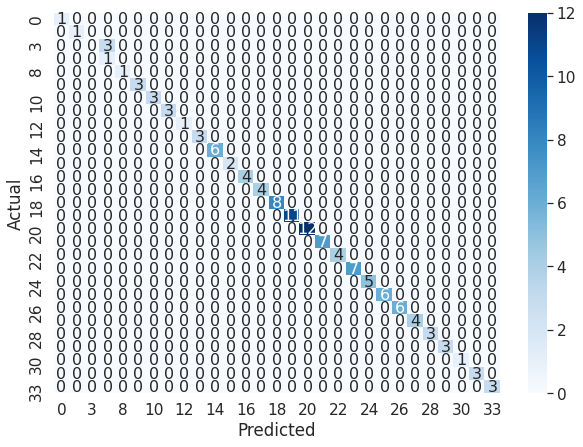

In [278]:
data = confusion_matrix(y_test, y_pred_nb)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

###Logistic Regression

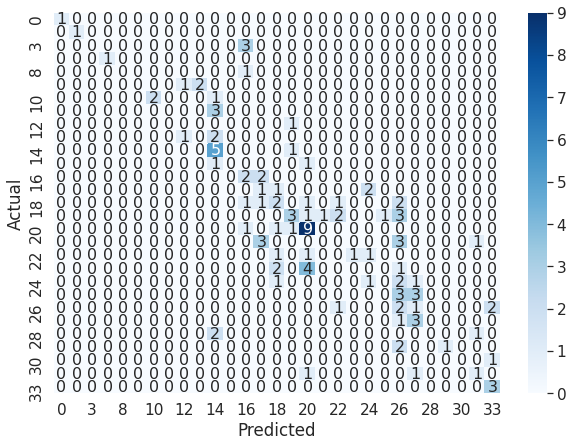

In [279]:
data = confusion_matrix(y_test, y_pred_lr)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

From all the above graphs we can see the Naive Bayes model captures the highest accuracy recall and presision and can be considered as the best performing model among all the 5 models. This way we can compute and compare different predictive models.